In [ ]:
!pip install plotly --upgrade
!pip install kneed # To install only knee-detection algorithm

In [9]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados

In [5]:
import pandas as pd
base= pd.read_csv('../../resources/iris.csv', sep=',',encoding='cp1252')
base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
X = base.iloc[:, 0:4].values
X.shape

(150, 4)

In [10]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


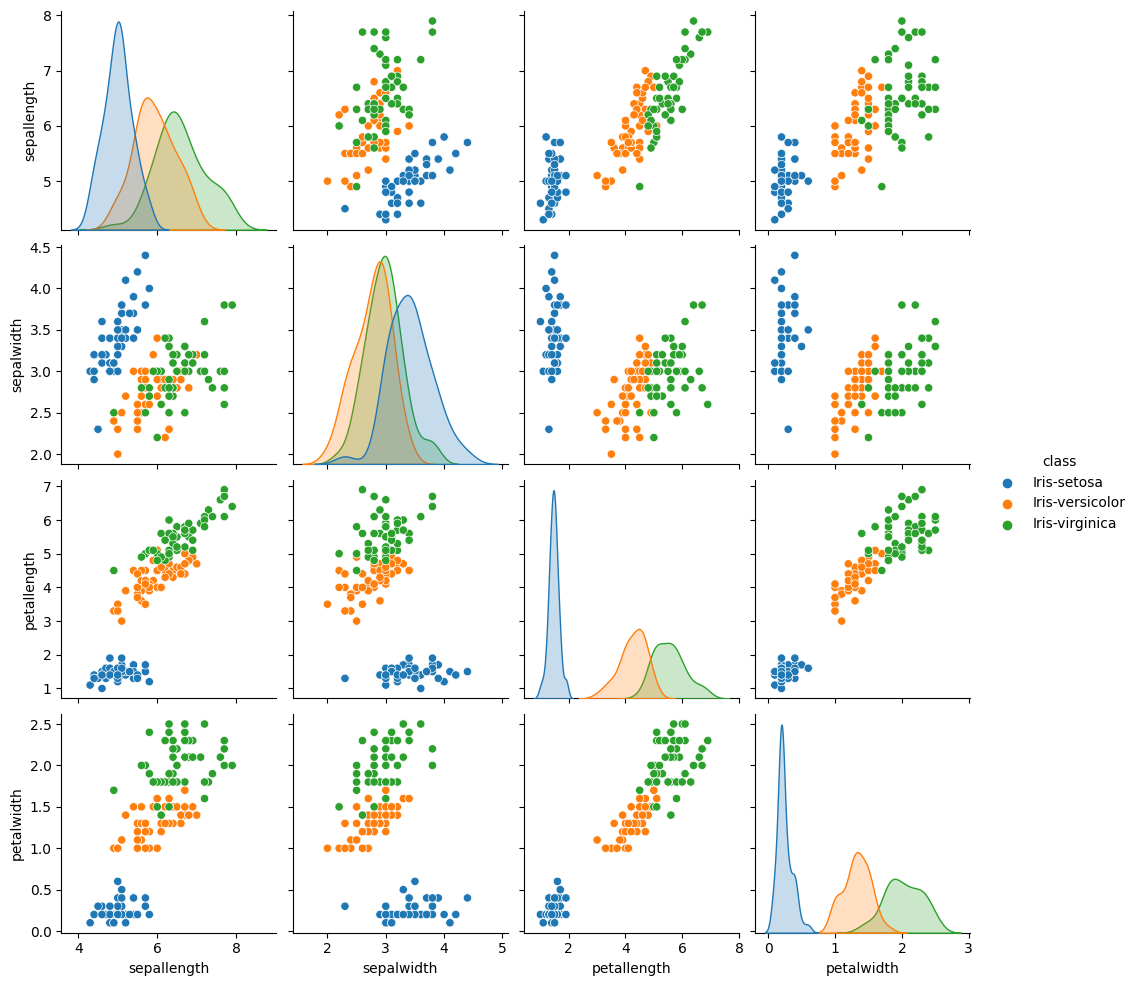

In [11]:
sns.pairplot(base,hue='class')

## K-means

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_o = kmeans.fit_predict(X)

/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
kmeans.fit(X)
kmeans.labels_
base['k-class'] = kmeans.labels_

/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
base

,sepallength,sepalwidth,petallength,petalwidth,class,k-class
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


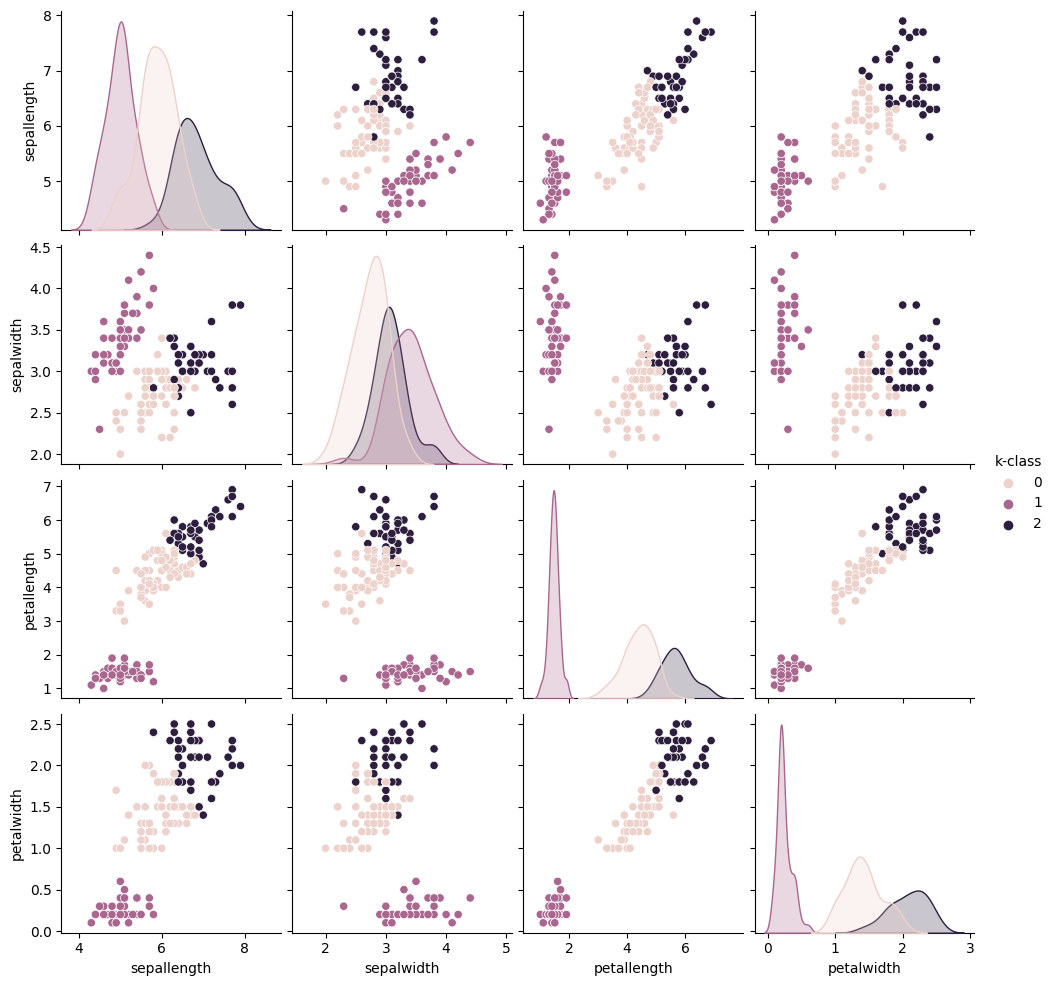

In [15]:
sns.pairplot(base,hue='k-class')

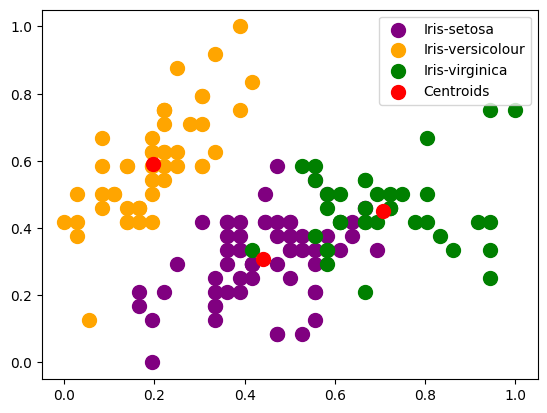

In [18]:
plt.scatter(X[kmeans_o == 0, 0], X[kmeans_o == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[kmeans_o == 1, 0], X[kmeans_o == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[kmeans_o == 2, 0], X[kmeans_o == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

## Silhouette

In [19]:
limit = int((X.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(X)
    pred = model.predict(X)
    score = silhouette_score(X, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.629
Silhouette Score k = 3: 0.504
Silhouette Score k = 4: 0.445
Silhouette Score k = 5: 0.355
Silhouette Score k = 6: 0.326
Silhouette Score k = 7: 0.342
Silhouette Score k = 8: 0.332


/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/

In [20]:
kmeans = KMeans(n_clusters=2, random_state=0)
saida_kmeans = kmeans.fit_predict(X)

/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


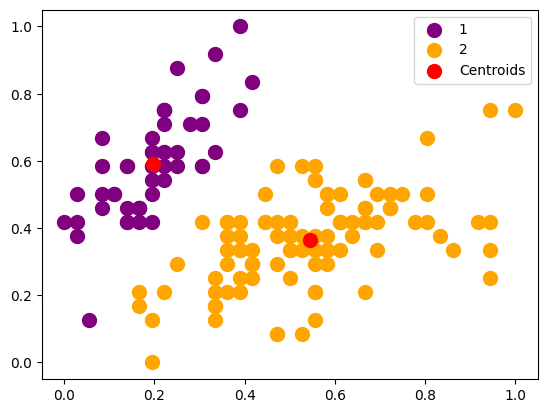

In [21]:
plt.scatter(X[saida_kmeans == 0, 0], X[saida_kmeans == 0, 1], s = 100, c = 'purple', label = '1')
plt.scatter(X[saida_kmeans == 1, 0], X[saida_kmeans == 1, 1], s = 100, c = 'orange', label = '2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

## Elbow

In [ ]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

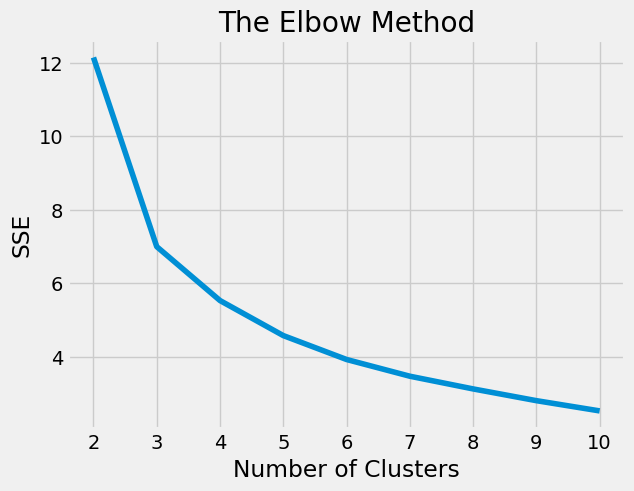

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [25]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_o = kmeans.fit_predict(X)

/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


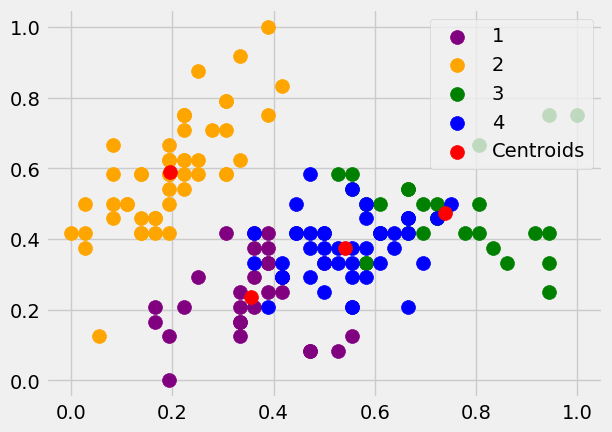

In [27]:
plt.scatter(X[kmeans_o == 0, 0], X[kmeans_o == 0, 1], s = 100, c = 'purple', label = '1')
plt.scatter(X[kmeans_o == 1, 0], X[kmeans_o == 1, 1], s = 100, c = 'orange', label = '2')
plt.scatter(X[kmeans_o == 2, 0], X[kmeans_o == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[kmeans_o == 3, 0], X[kmeans_o == 3, 1], s = 100, c = 'blue', label = '4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

## Calinski-Harabasz

In [29]:
from sklearn.metrics import calinski_harabasz_score
# limit = int((X.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(X)
    pred = model.predict(X)
    score = calinski_harabasz_score(X, pred)
    print('Calisnski Harabasz Score k = {}: {:<.3f}'.format(k, score))

Calisnski Harabasz Score k = 2: 353.367
Calisnski Harabasz Score k = 3: 358.567
Calisnski Harabasz Score k = 4: 313.184
Calisnski Harabasz Score k = 5: 289.978
Calisnski Harabasz Score k = 6: 273.907
Calisnski Harabasz Score k = 7: 259.161
Calisnski Harabasz Score k = 8: 246.149


/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/

## Davies-Bouldin

In [30]:
from sklearn.metrics import davies_bouldin_score
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(X)
    pred = model.predict(X)
    score = davies_bouldin_score(X, pred)
    print('Davies Bouldin Score k = {}: {:<.3f}'.format(k, score))

Davies Bouldin Score k = 2: 0.488
Davies Bouldin Score k = 3: 0.761
Davies Bouldin Score k = 4: 0.901
Davies Bouldin Score k = 5: 0.965
Davies Bouldin Score k = 6: 1.032
Davies Bouldin Score k = 7: 1.017
Davies Bouldin Score k = 8: 1.012


/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gustavo/Documents/Studies/ai-pg/venv/lib/python3.11/site-packages/sklearn/cluster/